In [1]:
import numpy as np
from scipy.integrate import odeint, quad
from scipy.optimize import brentq
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sbs


# The potential and its first derivative, as callables.
V = lambda x: 0.5 * x**2 * (0.5 * x**2 - 1)
dVdx = lambda x: x**3 - x



def deriv(X, t, gamma, delta, omega):
    """Return the derivatives dx/dt and d2x/dt2."""

    x, xdot = X
    xdotdot = -dVdx(x) -delta * xdot + gamma * np.cos(omega*t)
    return xdot, xdotdot

def solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega):
    """Solve the Duffing equation for parameters gamma, delta, omega.

    Find the numerical solution to the Duffing equation using a suitable
    time grid: tmax is the maximum time (s) to integrate to; t_trans is
    the initial time period of transient behaviour until the solution
    settles down (if it does) to some kind of periodic motion (these data
    points are dropped) and dt_per_period is the number of time samples
    (of duration dt) to include per period of the driving motion (frequency
    omega).

    Returns the time grid, t (after t_trans), position, x, and velocity,
    xdot, dt, and step, the number of array points per period of the driving
    motion.

    """
    # Time point spacings and the time grid

    period = 2*np.pi/omega
    dt = 2*np.pi/omega / dt_per_period
    step = int(period / dt)
    t = np.arange(0, tmax, dt)
    # Initial conditions: x, xdot
    X0 = [x0, v0]
    X = odeint(deriv, X0, t, args=(gamma, delta, omega))
    idx = int(t_trans / dt)
    return t[idx:], X[idx:], dt, step

# Set up the motion for a oscillator with initial position
# x0 and initially at rest.
x0, v0 = 0, 0
tmax, t_trans = 18000, 300
omega = 1.4
gamma, delta = 0.39, 0.1
dt_per_period = 100

# Solve the equation of motion.
t, X, dt, pstep = solve_duffing(tmax, dt_per_period, t_trans, x0, v0, gamma, delta, omega)
x, xdot = X.T



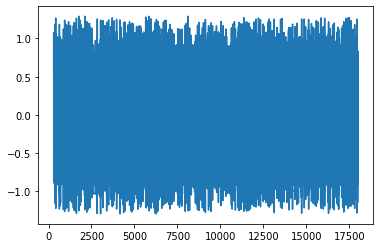

In [5]:
plt.plot(t,xdot)